## Example plotting following [ASP Docs Section 4.1](https://stereopipeline.readthedocs.io/en/latest/tutorial.html#lightning-fast-example-using-lunar-images) for Lunar Reconnaissance Orbiter (LRO) Narrow Angle Camera (NAC)

Below are example `asp_plot` outputs following the processing in ASP Docs "Lightning Fast" example [Section 4.1](https://stereopipeline.readthedocs.io/en/latest/tutorial.html#lightning-fast-example-using-lunar-images).

Download LRONAC data:

```bash
wget https://github.com/NeoGeographyToolkit/StereoPipelineSolvedExamples/releases/download/LRONAC/LRONAC_example.tar

tar xfv LRONAC_example.tar
```

---

Run stereo processing on a crop:

```bash
cd LRONAC_example
stereo_gui M181058717LE_crop.cub M181073012LE_crop.cub \
  M181058717LE.json M181073012LE.json                  \
  --alignment-method local_epipolar                    \
  --left-image-crop-win 2259 1196 900 973              \
  --right-image-crop-win 2432 1423 1173 1218           \
  --stereo-algorithm asp_mgm --subpixel-mode 9         \
  run/run
```

---

Run point2dem to produce DEM:

```bash
point2dem --auto-proj-center  \
  --errorimage run/run-PC.tif \
  --orthoimage run/run-L.tif
```

## Full report

Example command for full stereo-processing report

In [1]:
directory = "/Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_4_1_lunar_LRO_NAC/LRONAC_example"
stereo_directory = "run/"

In [2]:
!asp_plot \
  --directory $directory \
  --stereo_directory $stereo_directory \
  --subset_km 0.1 \
  --add_basemap False \
  --plot_icesat False \
  --plot_geometry False


Processing ASP files in /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_4_1_lunar_LRO_NAC/LRONAC_example


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.



ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_4_1_lunar_LRO_NAC/LRONAC_example/run/run-DEM.tif


Using map projection from DEM: EPSG:None


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.



ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_4_1_lunar_LRO_NAC/LRONAC_example/run/run-DEM.tif

Figure saved to /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_4_1_lunar_LRO_NAC/LRONAC_example/tmp_asp_report_plots/00.png
Plotting DEM results. This can take a minute for large in

## Individual plots

Example modular usage of `asp_plot` for this example processing.

### Processing Parameters

In [3]:
%load_ext autoreload
%autoreload 2

from asp_plot.processing_parameters import ProcessingParameters

In [4]:
processing_parameters = ProcessingParameters(
    processing_directory=directory,
    stereo_directory=stereo_directory
)
processing_parameters_dict = processing_parameters.from_log_files()

print(f"Processed on: {processing_parameters_dict['processing_timestamp']}\n")

print(f"Reference DEM: {processing_parameters_dict['reference_dem']}\n")

print(f"Bundle adjustment ({processing_parameters_dict['bundle_adjust_run_time']}):\n")
print(processing_parameters_dict["bundle_adjust"])

print(f"\nStereo ({processing_parameters_dict['stereo_run_time']}):\n")
print(processing_parameters_dict["stereo"])

print(f"\nPoint2dem ({processing_parameters_dict['point2dem_run_time']}):\n")
print(processing_parameters_dict["point2dem"])

Processed on: 2025-10-10 17:25:55

Reference DEM: 

Bundle adjustment (N/A):

Bundle adjustment not run

Stereo (0 hours and 3 minutes):

stereo M181058717LE_crop.cub M181073012LE_crop.cub M181058717LE.json M181073012LE.json --alignment-method local_epipolar --stereo-algorithm asp_mgm --subpixel-mode 9 run/run --left-image-crop-win 2259 1196 900 973 --right-image-crop-win 2432 1423 1173 1218 --corr-seed-mode 1 --sgm-collar-size 128 --compute-point-cloud-center-only --threads 8

Point2dem (0 hours and 0 minutes):

point2dem --auto-proj-center --errorimage run/run-PC.tif --orthoimage run/run-L.tif


### Scene Plots

In [5]:
from asp_plot.scenes import ScenePlotter

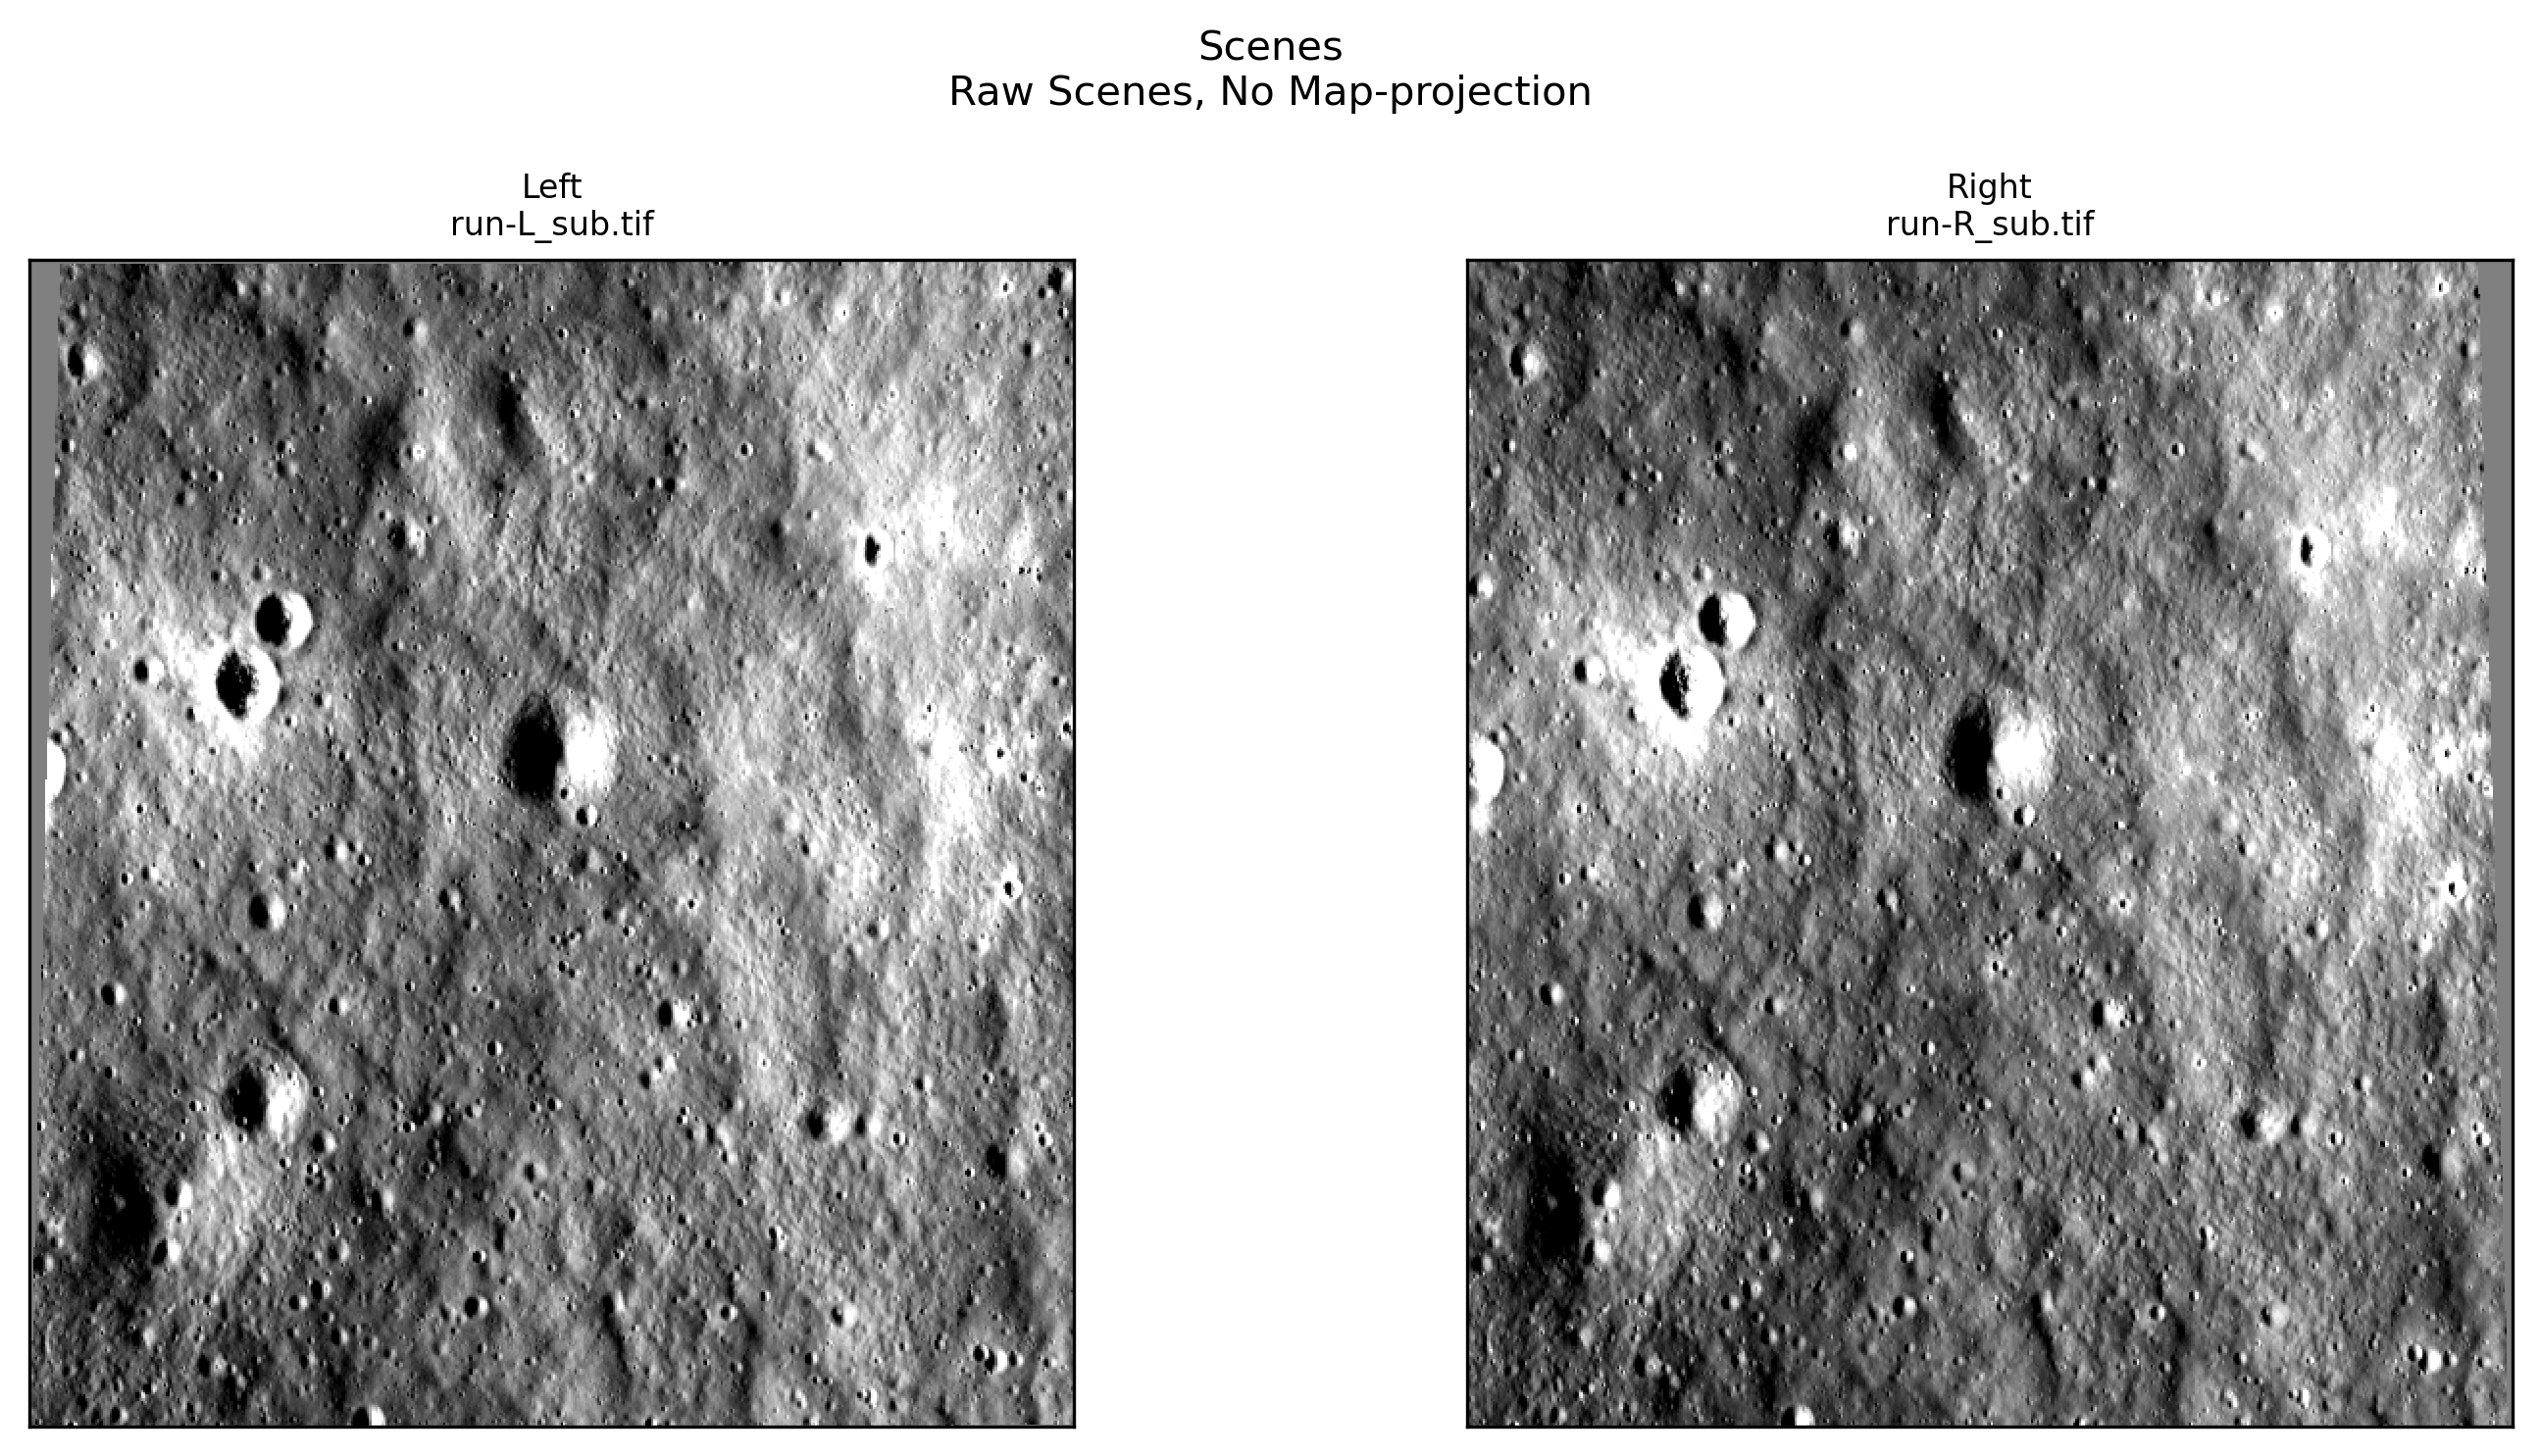

In [6]:
plotter = ScenePlotter(
  directory,
  stereo_directory,
  title="Scenes"
)

plotter.plot_scenes()

### Stereo Plots

In [7]:
from asp_plot.stereo import StereoPlotter

In [8]:
plotter = StereoPlotter(
  directory, 
  stereo_directory
)


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.





ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_4_1_lunar_LRO_NAC/LRONAC_example/run/run-DEM.tif



/Users/ben/miniconda3/envs/asp_plot/lib/python3.13/site-packages/osgeo/gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


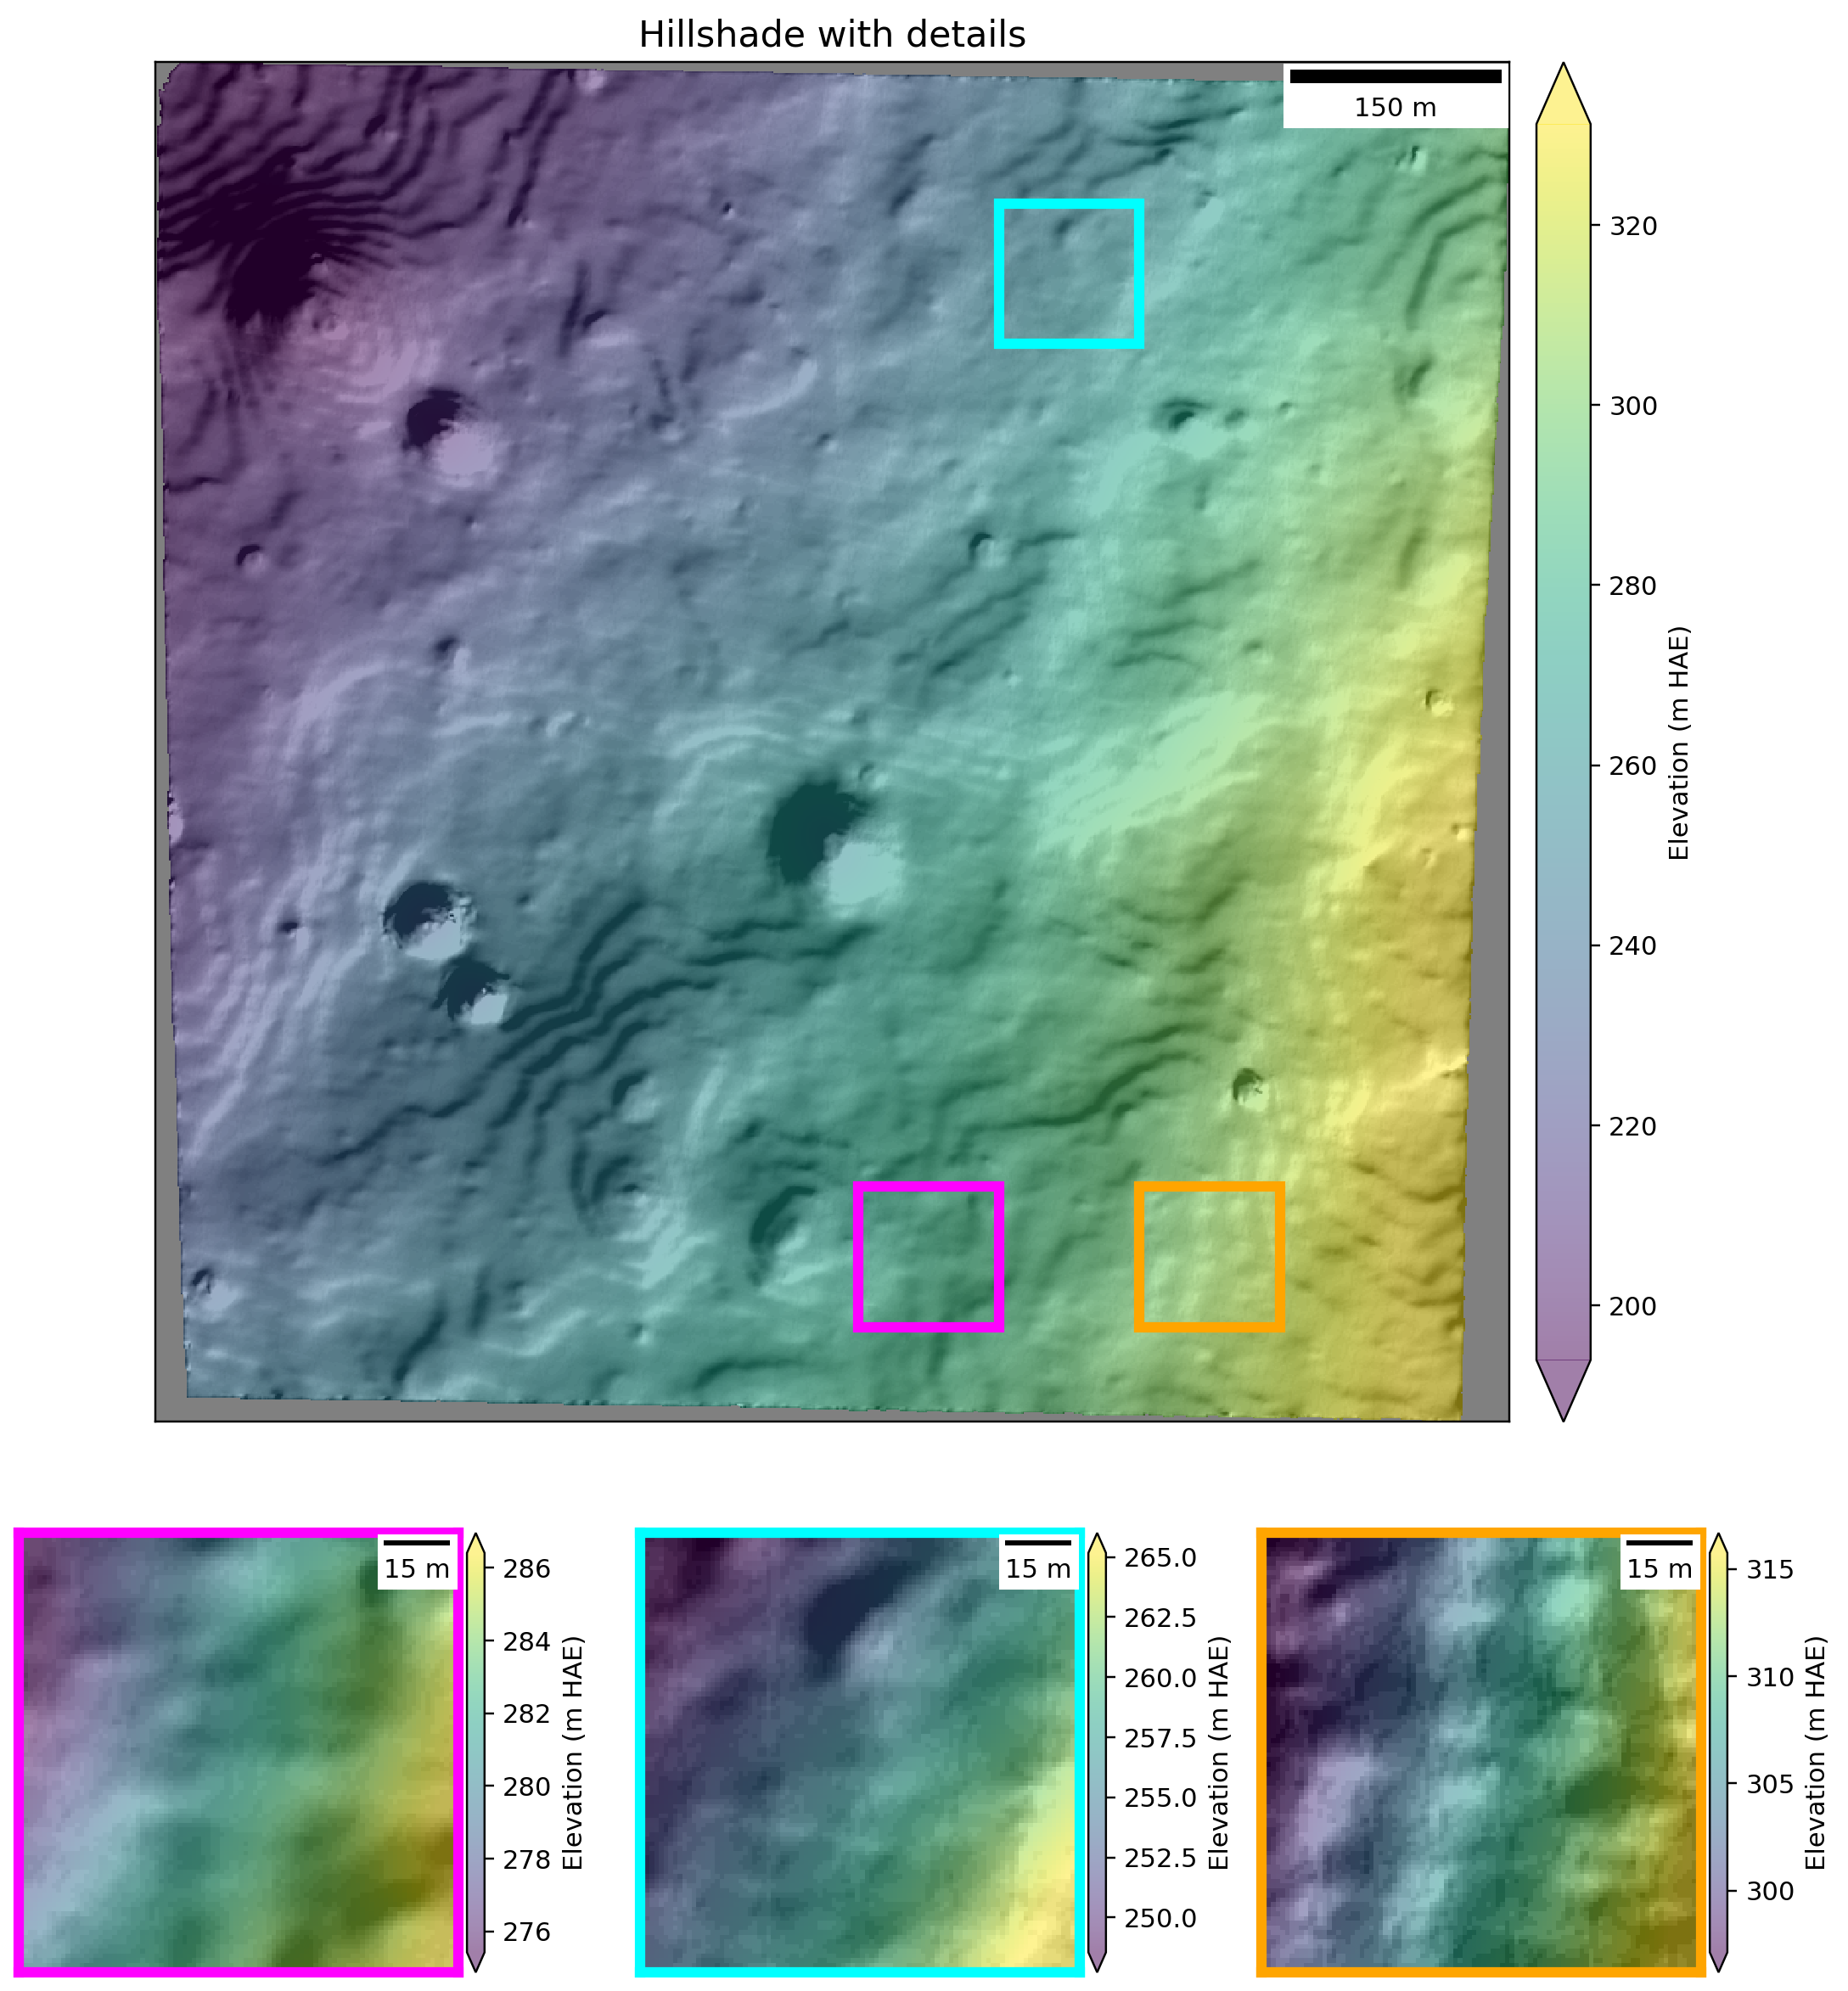

In [9]:
plotter.title = "Hillshade with details"

plotter.plot_detailed_hillshade(
  subset_km=0.1
)

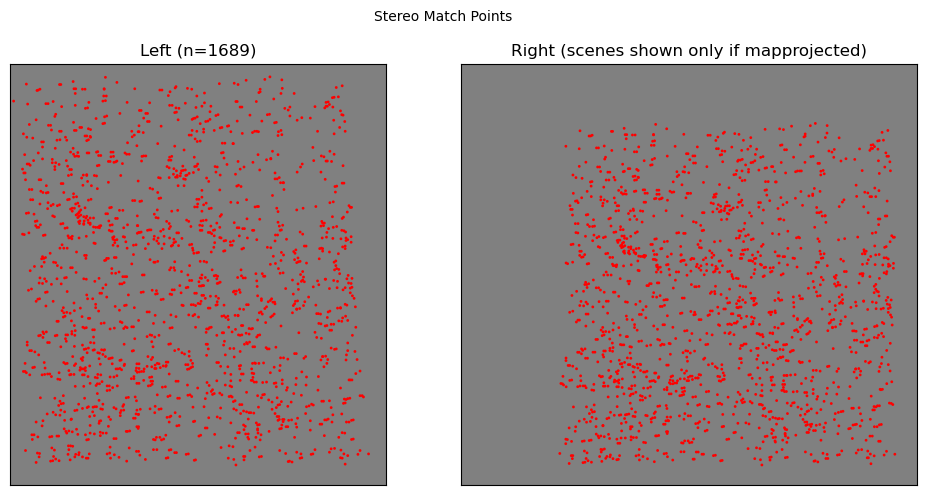

In [10]:
plotter.title="Stereo Match Points"

plotter.plot_match_points()

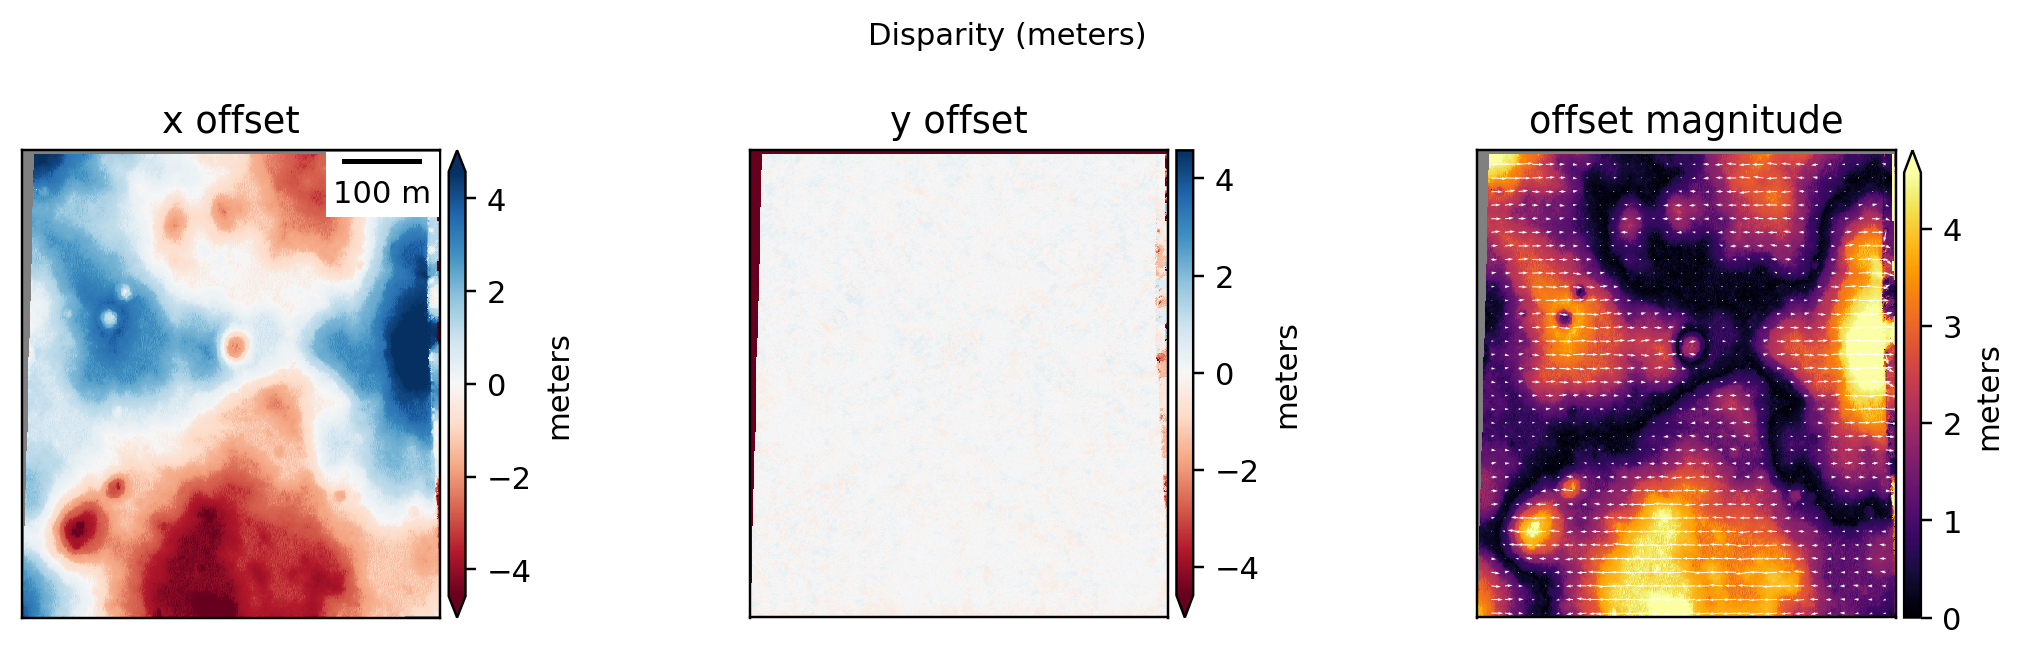

In [11]:
plotter.title = "Disparity (meters)"

plotter.plot_disparity(
  unit="meters",
  quiver=True,
)

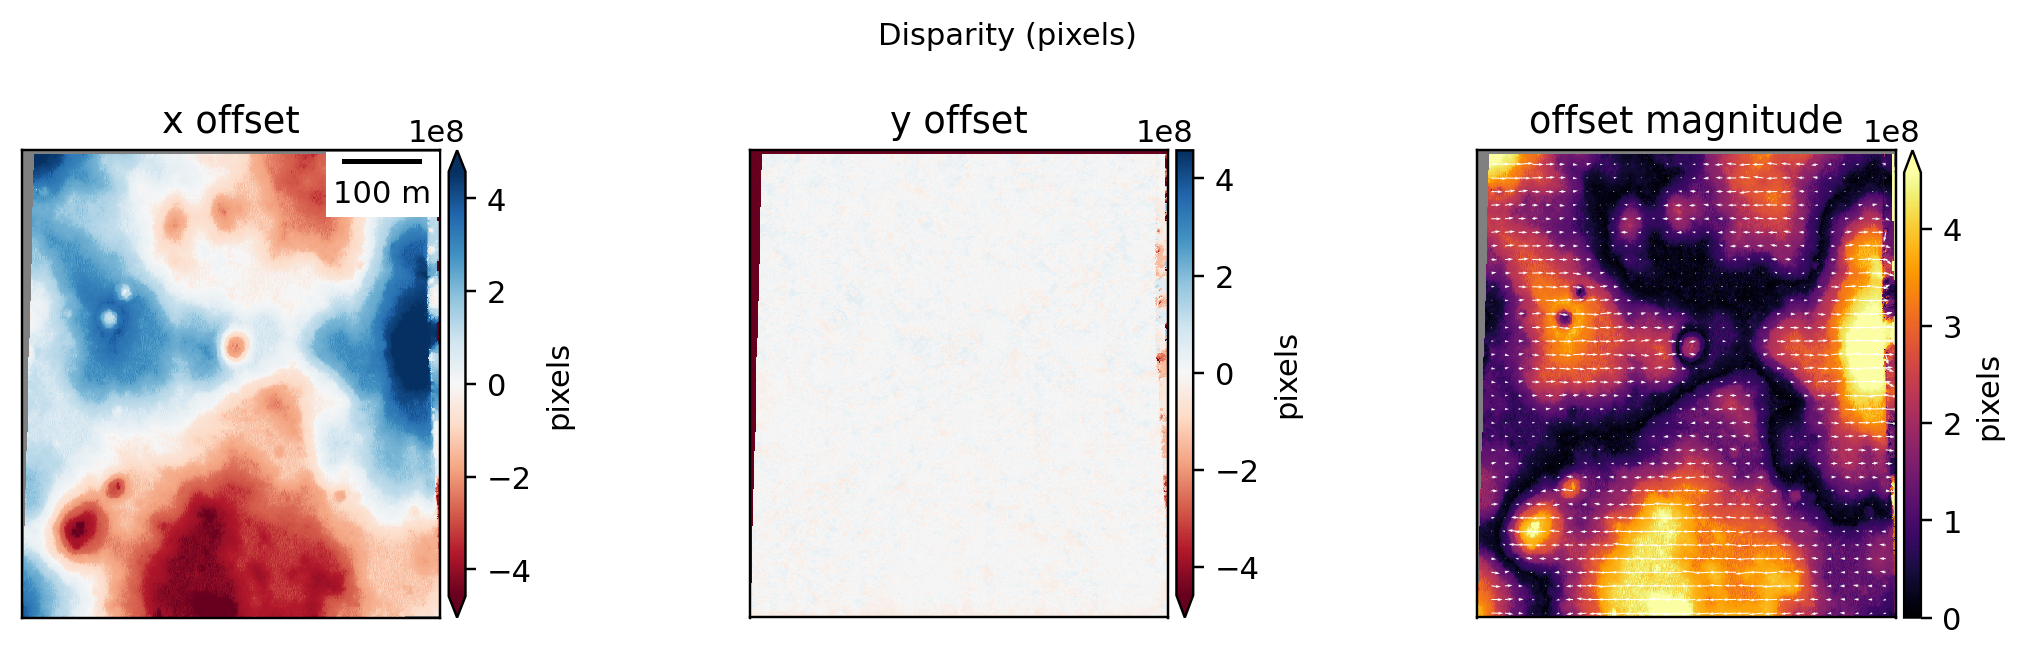

In [12]:
plotter.title = "Disparity (pixels)"

plotter.plot_disparity(
  unit="pixels",
  quiver=True,
)

Plotting DEM results. This can take a minute for large inputs.


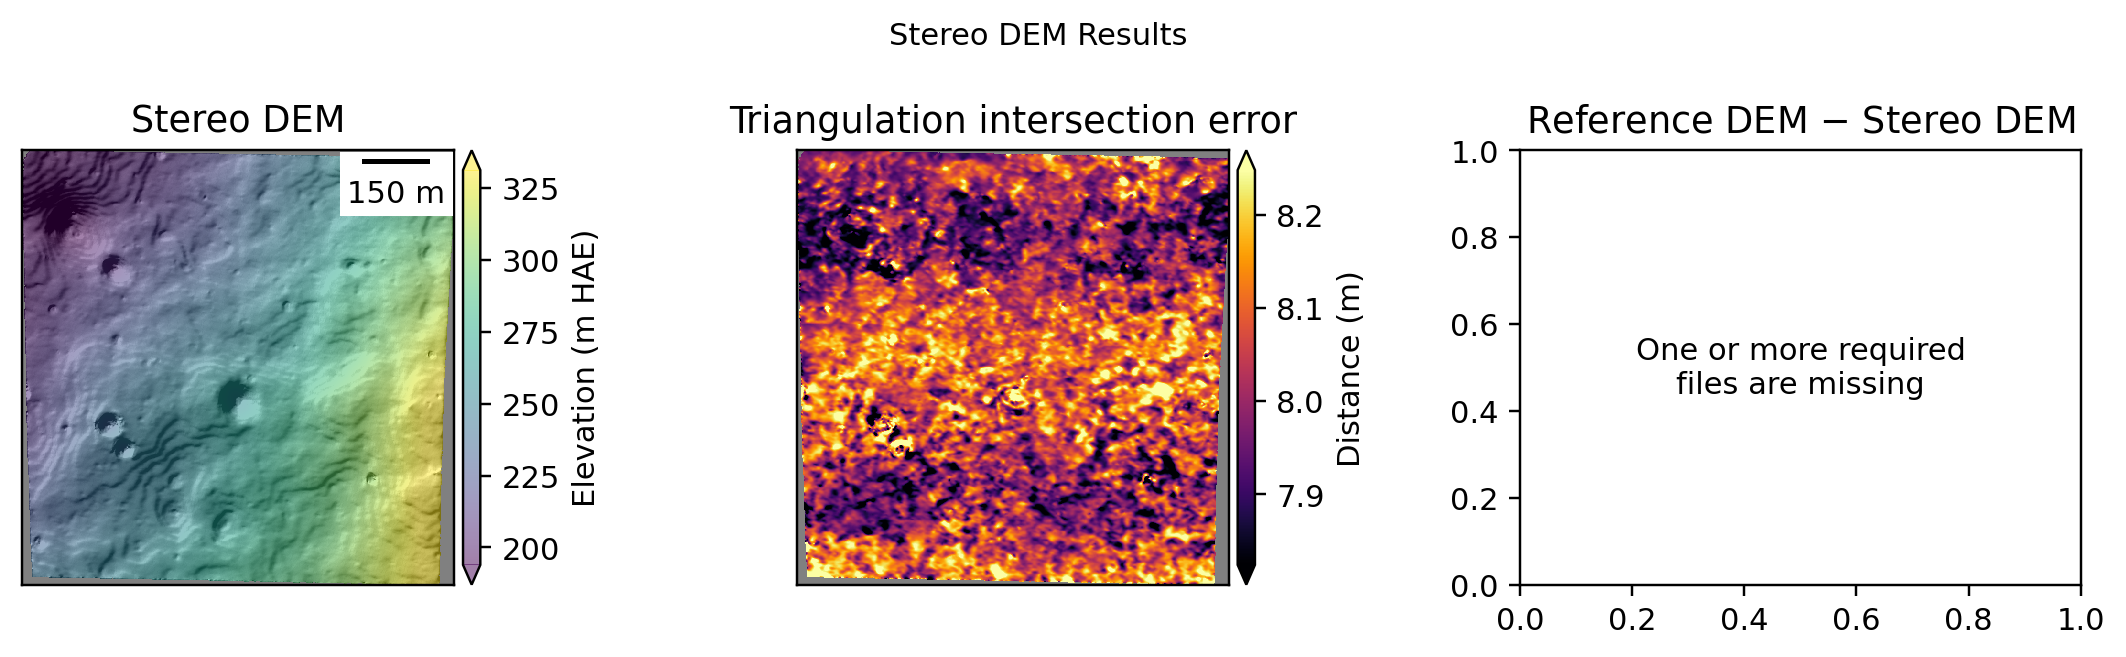

In [13]:
plotter.title = "Stereo DEM Results"

plotter.plot_dem_results()